<a href="https://colab.research.google.com/github/MoosaSaadat/handsonml/blob/master/noise_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

print(tf.__version__)

2.2.0


In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Train Shape: {x_train.shape}")
print(f"Test Shape: {x_test.shape}")

Train Shape: (60000, 28, 28)
Test Shape: (10000, 28, 28)


In [3]:
# Transform data
x_train = x_train / 255
x_test = x_test / 255
x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))
print(f"Train Shape: {x_train.shape}")
print(f"Test Shape: {x_test.shape}")

Train Shape: (60000, 784)
Test Shape: (10000, 784)


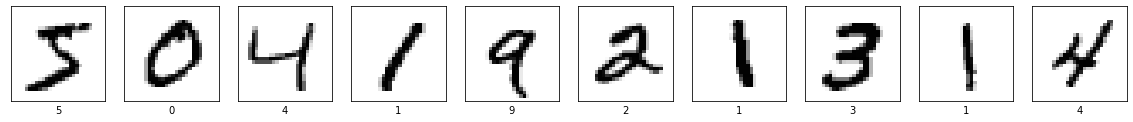

In [4]:
# Visualize dataset
def plot(x, p, labels=False):
  plt.figure(figsize=(20,2))

  for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x[i].reshape(28,28), cmap="binary")
    plt.xticks([])
    plt.yticks([])
    if labels:
      plt.xlabel(p[i])
  plt.show()

plot(x_train, y_train, True)

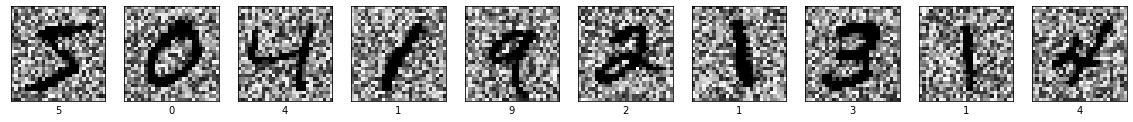

In [13]:
# Add noise
x_train_noisy = x_train + (
    np.random.rand(x_train.shape[0], x_train.shape[1]) * 0.9
)
x_test_noisy = x_test + (
    np.random.rand(x_test.shape[0], x_test.shape[1]) * 0.9
)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

plot(x_train_noisy, y_train, True)

In [15]:
# Create model
model = Sequential([
  Dense(256, activation='relu', input_shape=(784,))  ,
  Dense(256, activation='relu'),
  Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Train model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1989 - accuracy: 0.9388
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0840 - accuracy: 0.9736
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0589 - accuracy: 0.9808
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0442 - accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0344 - accuracy: 0.9890
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0285 - accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0253 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0204 - accuracy: 0.9936
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0176 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.016

In [17]:
# Evaluate on both datasets
_, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Accuracy on original data: {acc*100:.2f}%")
_, acc = model.evaluate(x_test_noisy, y_test, verbose=0)
print(f"Accuracy on noisy data: {acc*100:.2f}%")

Accuracy on original data: 97.66%
Accuracy on noisy data: 38.71%


In [18]:
# Build auto-encoder
input_image = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_image)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_image, decoded)
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [19]:
# Train auto-encoder
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=100, batch_size=512,
    validation_split=0.2, verbose=False,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5),
        LambdaCallback(on_epoch_end=lambda e,l: print('{:.3f}'.format(l['val_loss']), end=' _ '))
    ]
)

print(' _ ')
print('Training is complete!')

0.256 _ 0.219 _ 0.195 _ 0.179 _ 0.168 _ 0.159 _ 0.152 _ 0.146 _ 0.140 _ 0.136 _ 0.132 _ 0.128 _ 0.125 _ 0.123 _ 0.121 _ 0.119 _ 0.117 _ 0.116 _ 0.115 _ 0.113 _ 0.113 _ 0.112 _ 0.111 _ 0.110 _ 0.110 _ 0.109 _ 0.109 _ 0.108 _ 0.108 _ 0.108 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.106 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _ 0.105 _  _ 
Training is complete!


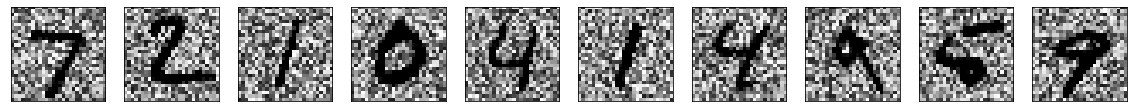

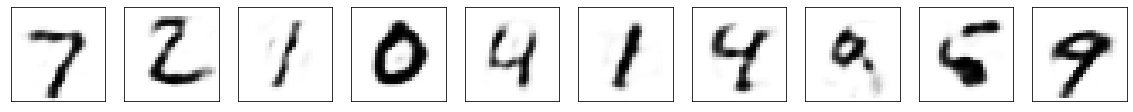

In [20]:
# Predict
predictions = autoencoder.predict(x_test_noisy)

plot(x_test_noisy, None)
plot(predictions, None)